## Naive Bayes Project

In [93]:
#Import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [104]:
#Read the file 
data=pd.read_csv('mushrooms.csv')

In [95]:
#First 5 rows of data
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
#Shape of dataset
data.shape

(8124, 23)

In [6]:
#Columns of data
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
#Change characters in dataset
data.columns=data.columns.str.replace('-','_')

In [96]:
#Check null values of dataset
data.isnull().sum().sum()

0

In [97]:
#Check duplicates of dataset
data.duplicated().sum()

0

In [99]:
#Get some statistics information for columns
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [100]:
#Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [101]:
#Number of unique values in columns
for column in data.columns:
    unique_columns = data[column].unique()
    print(column, ":", unique_columns)

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


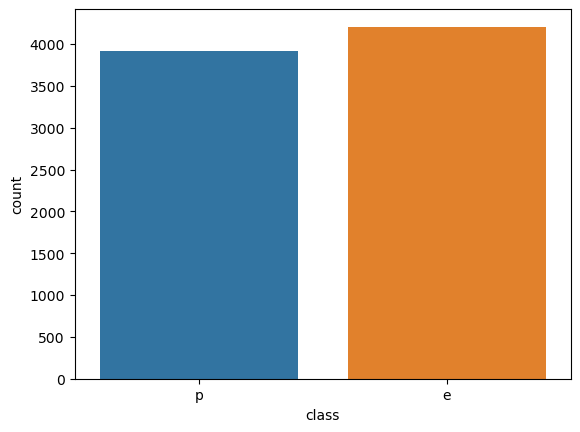

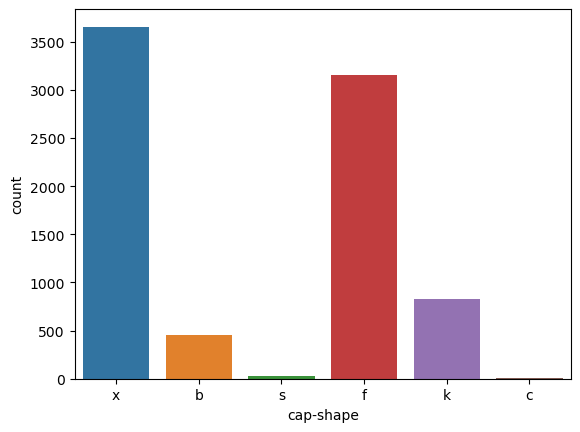

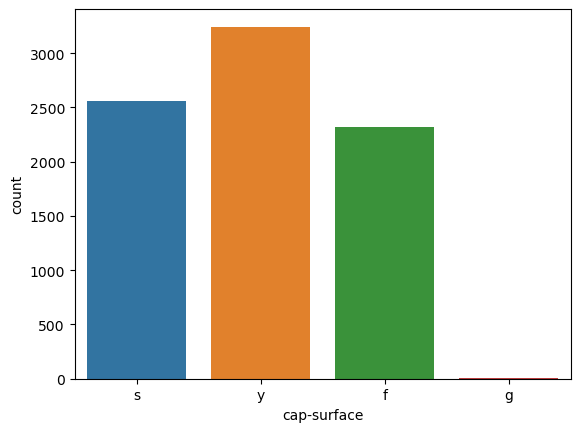

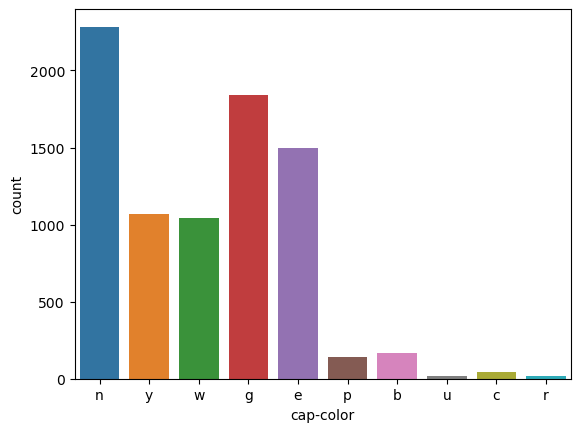

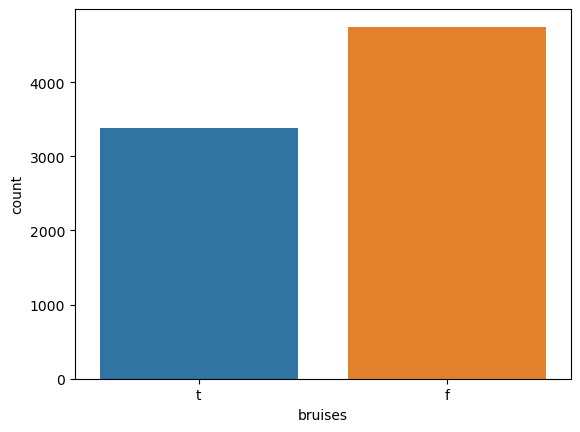

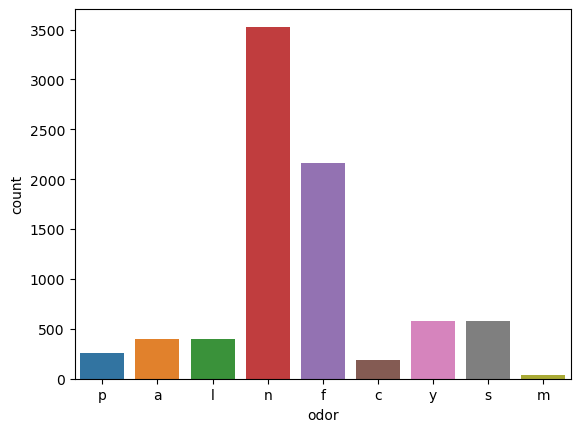

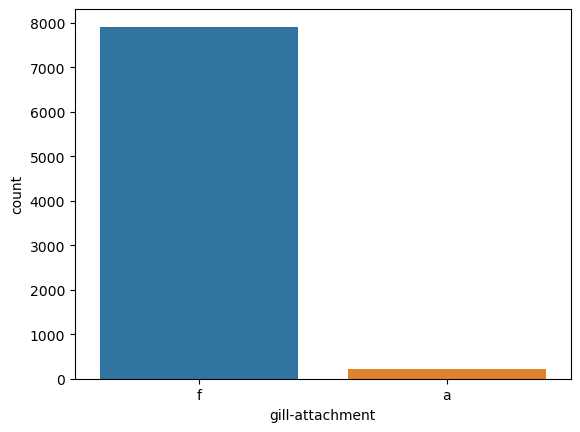

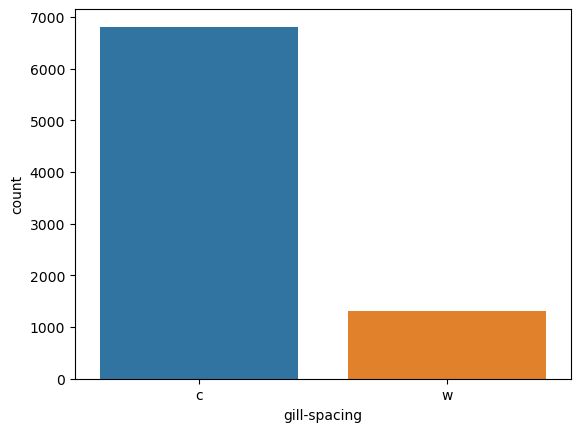

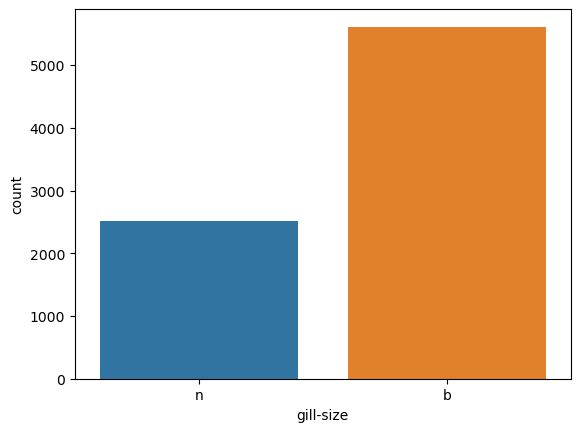

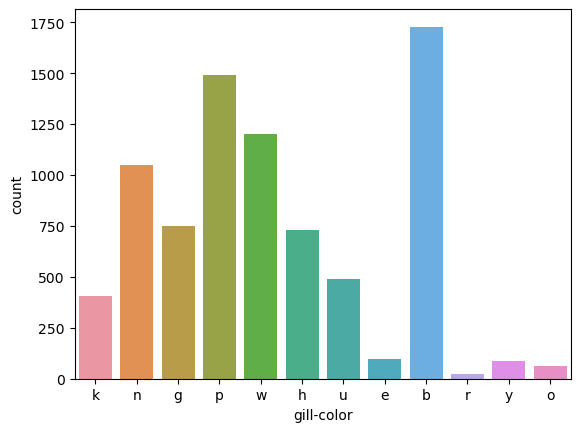

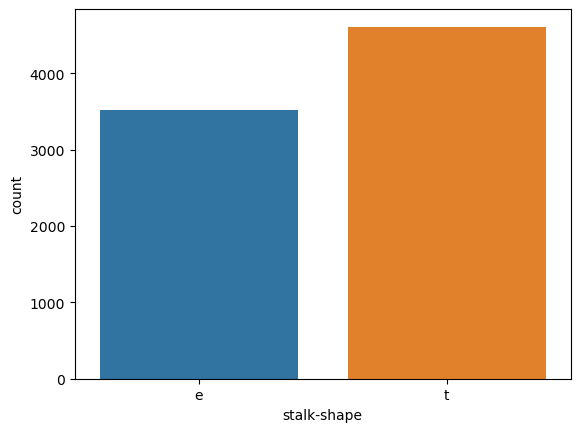

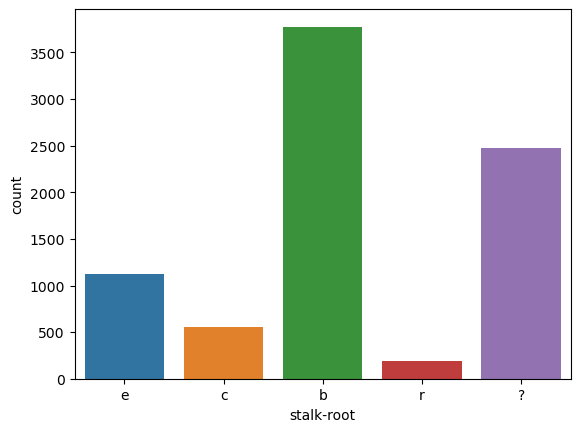

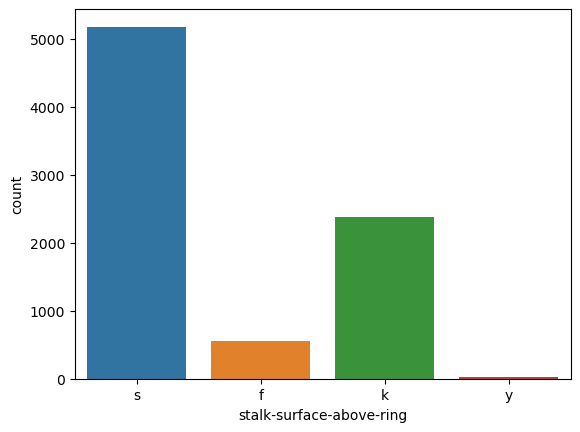

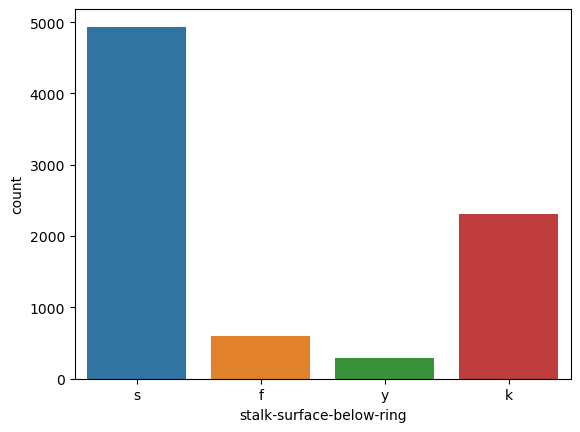

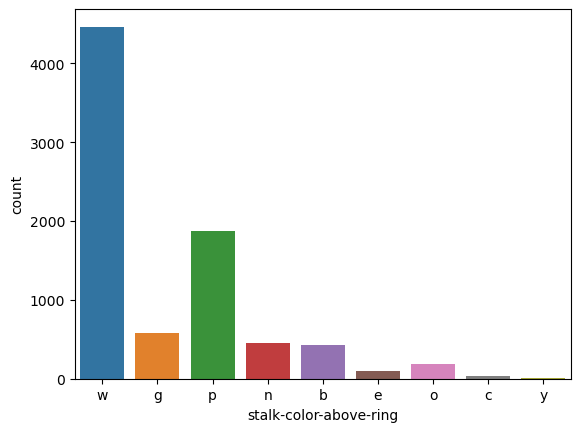

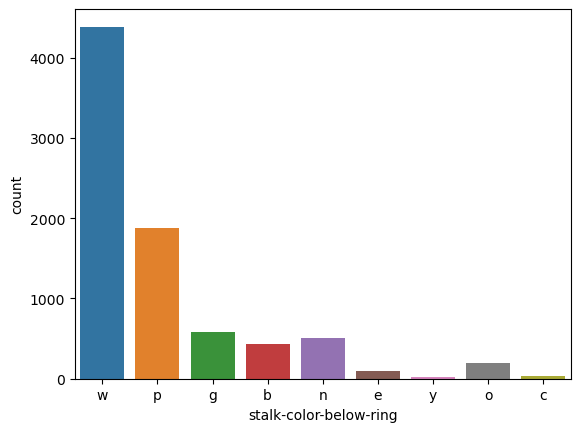

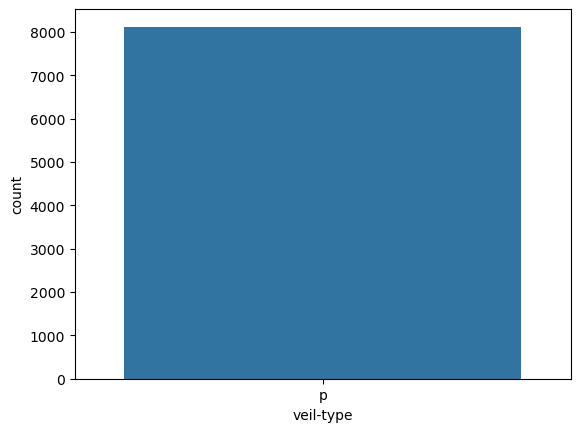

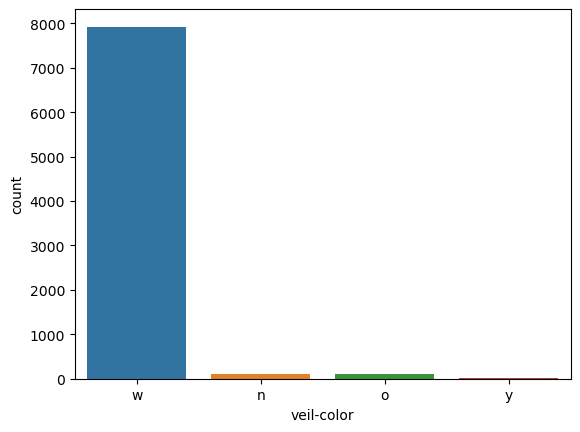

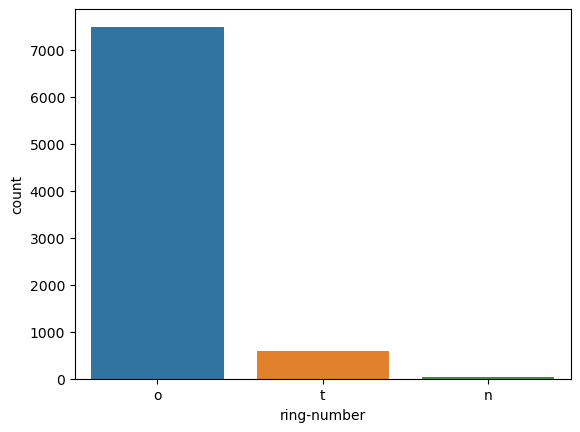

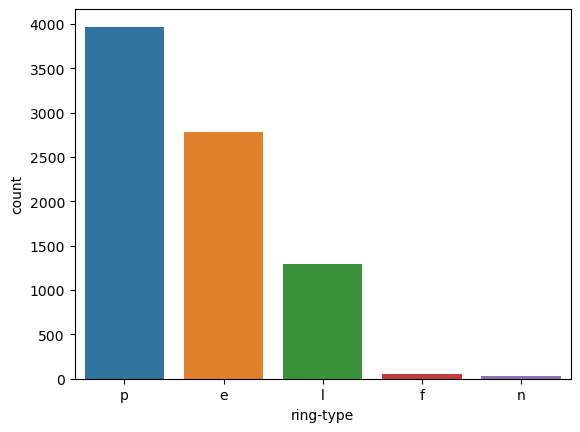

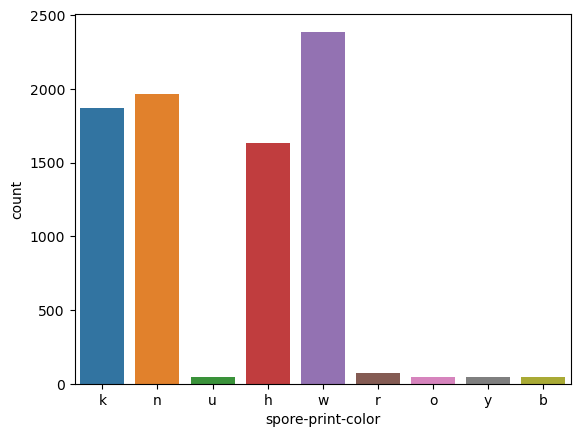

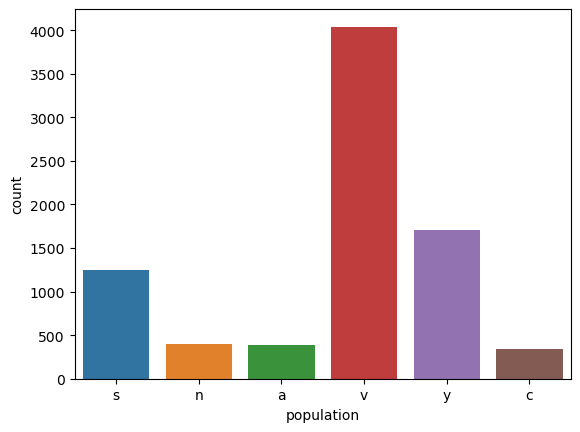

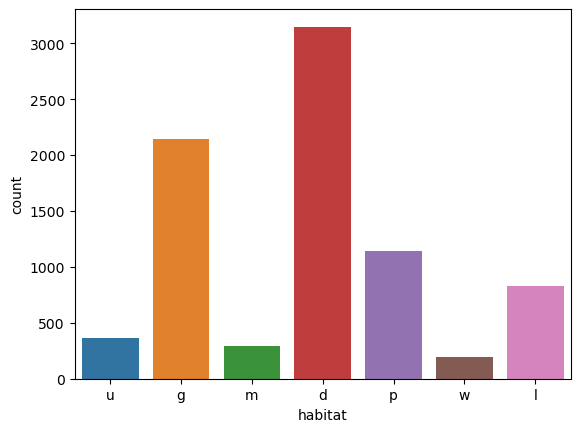

In [102]:
#Let's visualize the dataset
columns=data.columns

for column in columns :
    sns.countplot(x=column,data=data)
    plt.show()

## One Hot Encoding

In [105]:
#Encode the columns except target variable (class)
encoding_columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [106]:
data=pd.get_dummies(data,columns=encoding_columns)

In [107]:
data.shape

(8124, 118)

In [108]:
#Now let's encode targer variable--y---data['class']

data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [109]:
data['class']=data['class'].map({'e':0,'p':1})

In [110]:
data['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

## Features Variables and Target Variable

In [111]:
#Features
X=data.drop('class', axis =1)


#Target
y=data['class']

## Train Test Split

Separate dataset to Train and Test.

%80 --- Train Data

%20 --- Test Data

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [113]:
#Number of rows in train data
len(X_train),len(y_train)

(6499, 6499)

In [114]:
#Number of rows in test data
len(X_test),len(y_test)

(1625, 1625)

## Feature Scaling

In [115]:
columns=X_train.columns
columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [116]:
#Defien scaling
Scaling=StandardScaler()

In [117]:
#Scale train and test data
X_train=Scaling.fit_transform(X_train)
X_test=Scaling.transform(X_test)

In [118]:
#Type of train and test data after scaling
type(X_train),type(X_test)

(numpy.ndarray, numpy.ndarray)

In [119]:
#let's converts test and train data to pandas dataframe
X_train=pd.DataFrame(X_train,columns=cols)
X_test=pd.DataFrame(X_test,columns=cols)

In [120]:
#Let's check again type of train and test data
type(X_train),type(X_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

## Model Development

In [121]:
#Define the model
model=GaussianNB()

In [122]:
#Fit train data
model.fit(X_train,y_train)

GaussianNB()

## Prediction on Test Dataset

In [123]:
#Predict X test data
y_pred=model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

## Analysis of Prediction (Accuracy Score)

In [126]:
#it looks that target variable of our data is homogeneous. This is why we can use accuracy score to find our model's power
data['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [128]:
#Let's print accuracy score of our model
print('Accuracy score of the model:',accuracy_score(y_test,y_pred))

Accuracy score of the model: 0.9452307692307692


## Prediction on Train dataset

In [129]:
#Predict train dataset
y_pred_train=model.predict(X_train)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [130]:
#Print accuracy score of train dataset 
print('Accuracy score of train model:',accuracy_score(y_train,y_pred_train))

Accuracy score of train model: 0.9530697030312356


## Interpretation

Both Train Data and Test Data Scores are fine and close to each other.

Therefore, there is neither Overfitting nor Underfitting.

We have built a good model